In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28, 1)/ 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=.2, random_state=42)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2, 2))

In [9]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [13]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
check_point_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_vet_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20


1500/1500 [==============================] - 18s 11ms/step - loss: 0.5311 - accuracy: 0.8106 - val_loss: 0.3656 - val_accuracy: 0.8656
Epoch 2/20
  10/1500 [..............................] - ETA: 18s - loss: 0.4154 - accuracy: 0.8500

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 22s 15ms/step - loss: 0.3483 - accuracy: 0.8724 - val_loss: 0.2832 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3004 - accuracy: 0.8889 - val_loss: 0.2632 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2663 - accuracy: 0.9039 - val_loss: 0.2332 - val_accuracy: 0.9134
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2391 - accuracy: 0.9112 - val_loss: 0.2285 - val_accuracy: 0.9138
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2224 - accuracy: 0.9185 - val_loss: 0.2280 - val_accuracy: 0.9137
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2017 - accuracy: 0.9256 - val_loss: 0.2166 - val_accuracy: 0.9206
Epoch 8/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1889 - accuracy: 0.9300 - val_loss: 0.2362 - val_accura

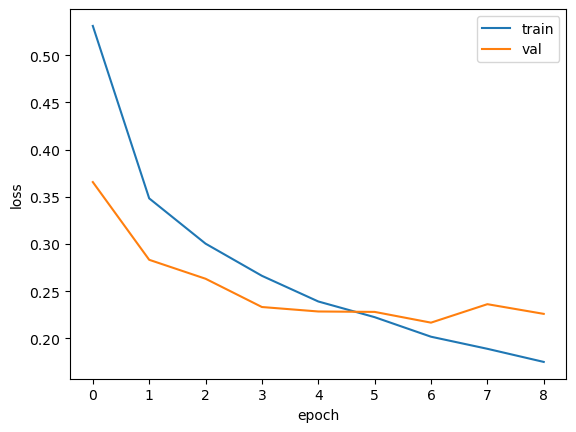

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2166 - accuracy: 0.9206


[0.21663454174995422, 0.9205833077430725]

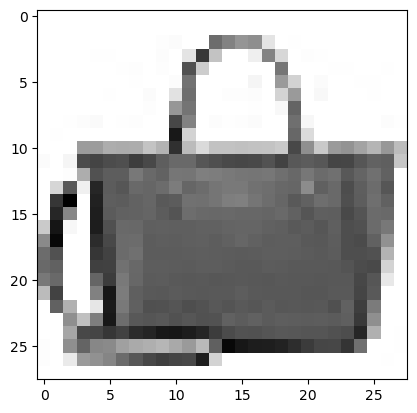

In [21]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [22]:
preds = model.predict(val_scaled[:1])
preds

1/1 [==============================] - 0s 138ms/step


array([[9.7938895e-20, 3.6728289e-27, 1.4596401e-21, 9.2778691e-20,
        3.0147961e-20, 1.6482732e-17, 9.9005382e-19, 4.2290833e-17,
        1.0000000e+00, 5.6434539e-21]], dtype=float32)

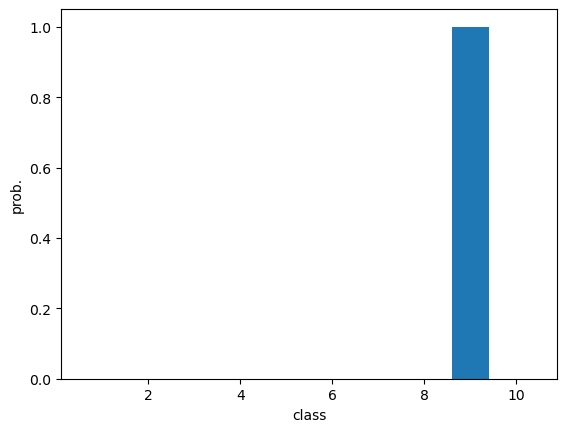

In [24]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [25]:
classes = ['티셔츠', '바지', '스웨터', '드레스' ,'코트' ,'샌달' ,'셔츠' ,'스니커즈' ,'가방', '앵클 부츠']

In [26]:
import numpy as np
classes[np.argmax(preds)]

'가방'

In [27]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.2479 - accuracy: 0.9140


[0.24789533019065857, 0.9139999747276306]